# Bank Churn - Prediction

 #  Problem Statement :
     A predictive analysis approach to predict, if a customer is going to churn or not using various Machine Learning                Algorithm.



# Details about the dataset:
   It consists of 10000 observations and 12 variables. Independent variables contain information about customers. Dependent  
   variable refers to customer abandonment status.

Variables:

RowNumber — corresponds to the record (row) number and has no effect on the output. This column will be removed.

CustomerId — contains random values and has no effect on customer leaving the bank. This column will be removed.

Surname — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

CreditScore — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

Geography — a customer’s location can affect their decision to leave the bank. We’ll keep this column.

Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank. We’ll include this column, too.

Age — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

Tenure — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

Balance — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

NumOfProducts — refers to the number of products that a customer has purchased through the bank.

HasCrCard — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. (0=No,1=Yes)

IsActiveMember — active customers are less likely to leave the bank, so we’ll keep this. (0=No,1=Yes)

EstimatedSalary — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

Exited — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

In [3]:
# Importing data set
df = pd.read_csv('churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Inspecting the Dataframe
# Let's see the head of our dataset - Top 5 rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Let's see the tail of our dataset 
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
# Let's check the dimensions of the dataframe
df.shape

(10000, 14)

In [7]:
# let's look at the statistical aspects of the dataframe
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# Let's see the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
# dropping a variables
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Data Visualization

In [10]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


# Analysis in Gender

In [12]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<AxesSubplot:>

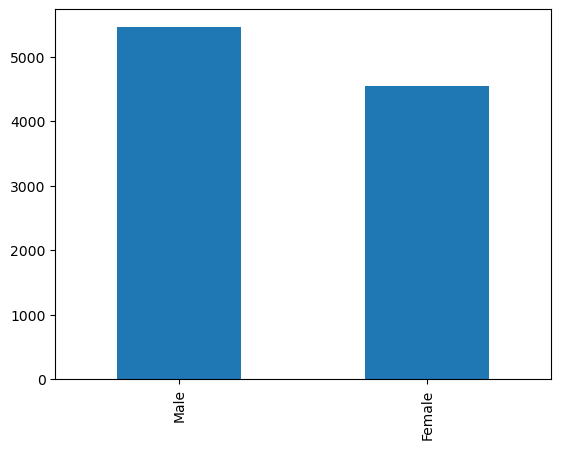

In [13]:
df["Gender"].value_counts().plot.bar()

In [14]:
df.groupby('Gender')['Exited'].value_counts()

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: Exited, dtype: int64

In [15]:
group=df.groupby('Gender')['Exited'].value_counts(normalize=True).mul(100)
group

Gender  Exited
Female  0         74.928461
        1         25.071539
Male    0         83.544072
        1         16.455928
Name: Exited, dtype: float64

In [16]:
grouped_df = group.rename('Percentage').reset_index()
grouped_df

,Gender,Exited,Percentage
0,Female,0,74.928461
1,Female,1,25.071539
2,Male,0,83.544072
3,Male,1,16.455928


<AxesSubplot:xlabel='Gender', ylabel='Percentage'>

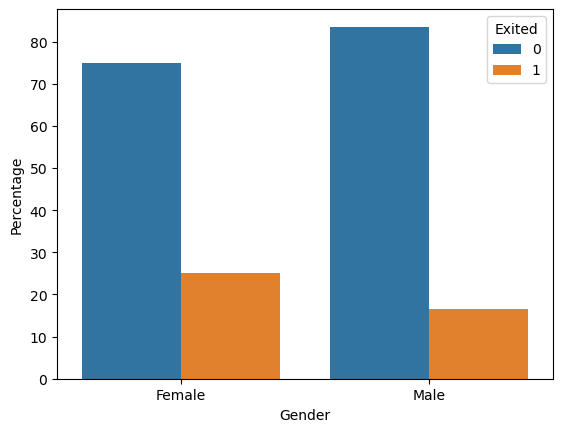

In [17]:
sns.barplot(x='Gender', y='Percentage', hue='Exited', data=grouped_df)

# Geography

<AxesSubplot:>

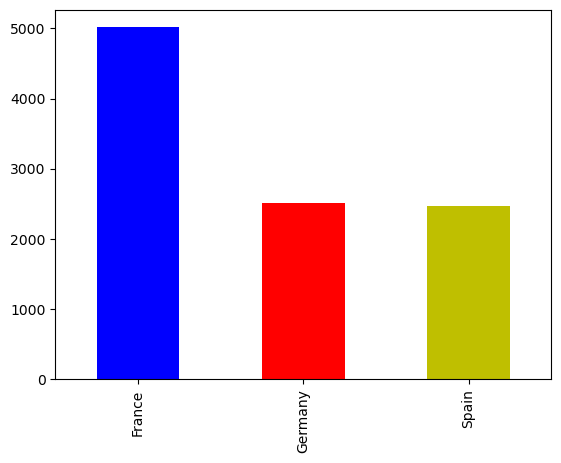

In [18]:
df["Geography"].value_counts().plot.bar(color=['b','r','y'])

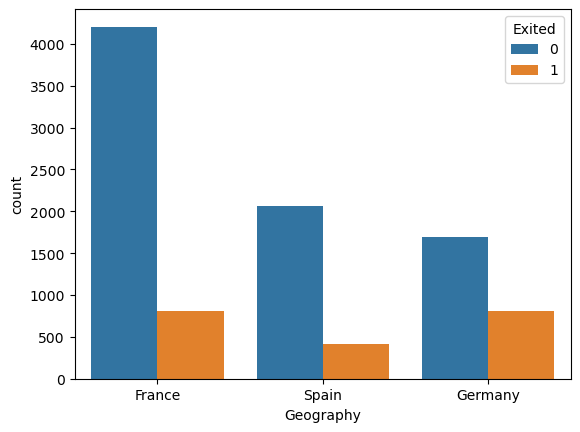

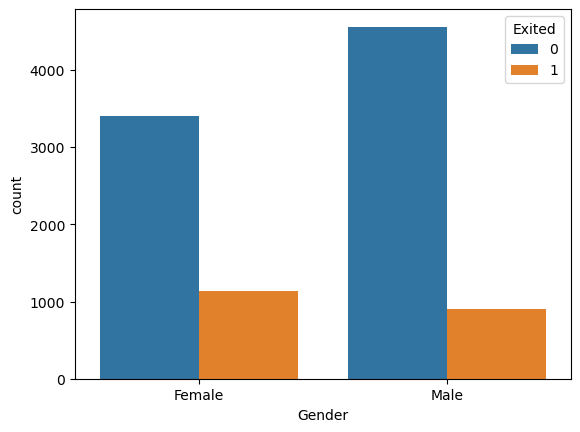

In [19]:
 # Shows the Distribution of Exited with respect to other variables

categorical = ['Geography','Gender']

for i in categorical:
    sns.countplot(x=df[i],data=df, hue = df['Exited'])
    plt.show()

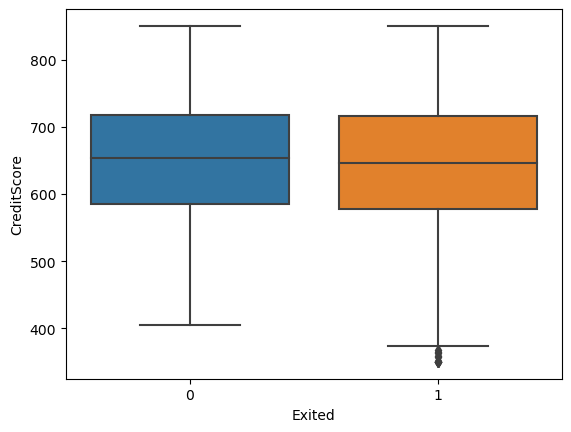

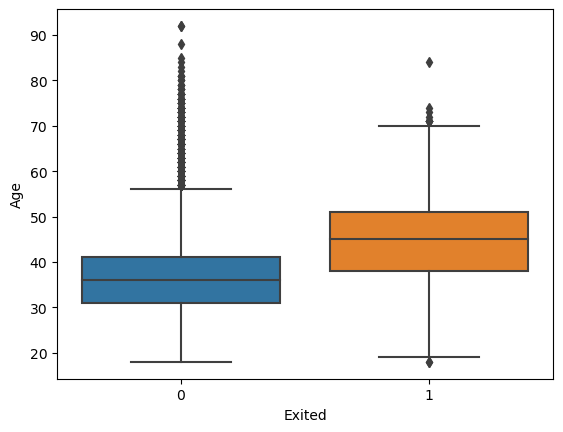

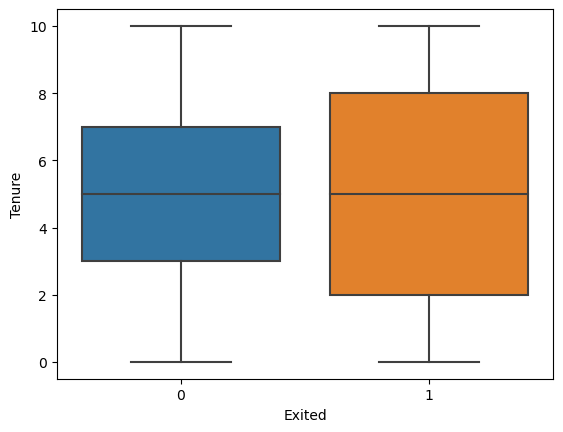

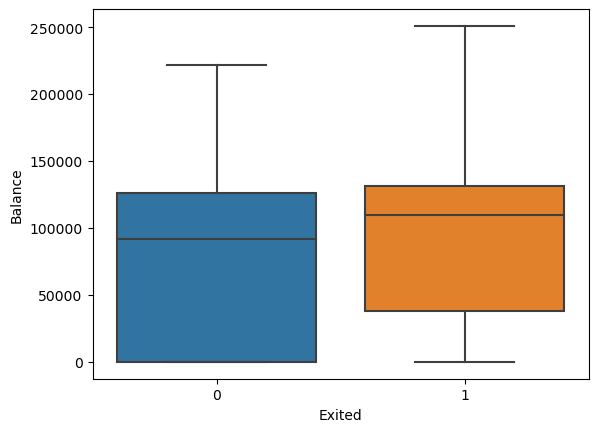

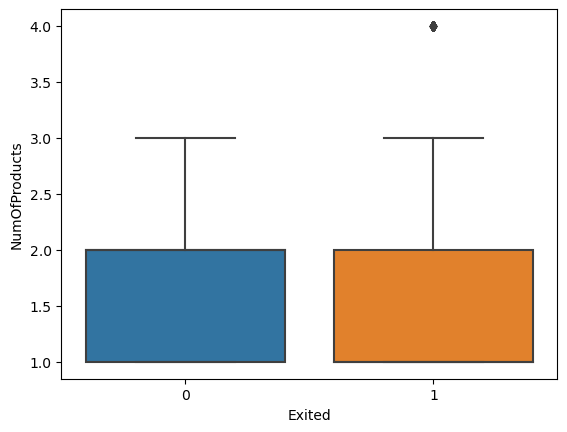

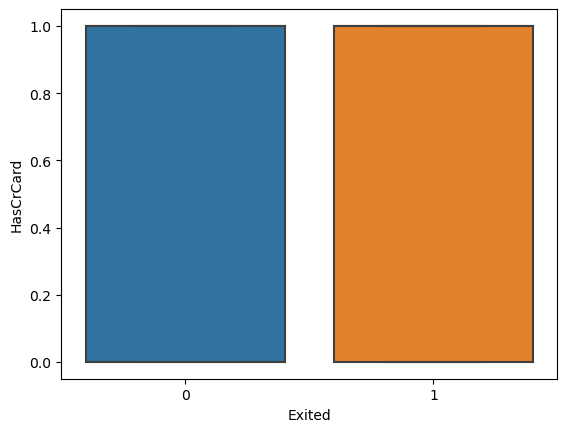

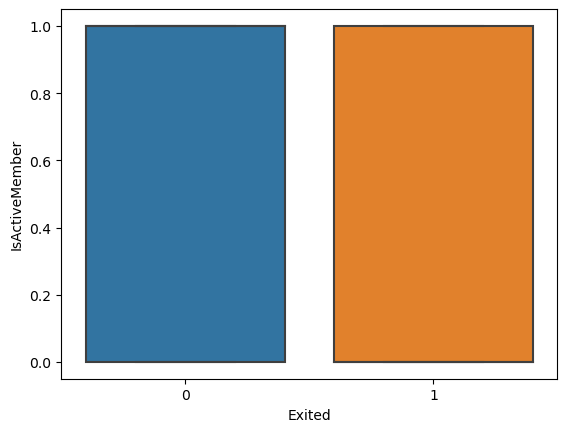

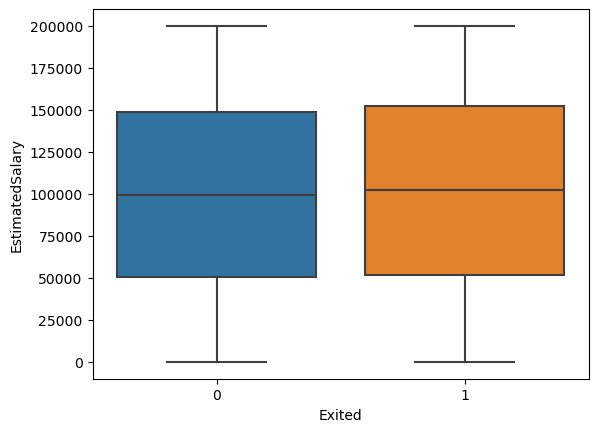

In [20]:
continuous = ['CreditScore', 'Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']

for i in continuous:
    sns.boxplot(x = df['Exited'], y = df[i])
    plt.show()

array([[<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>],
       [<AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>]], dtype=object)

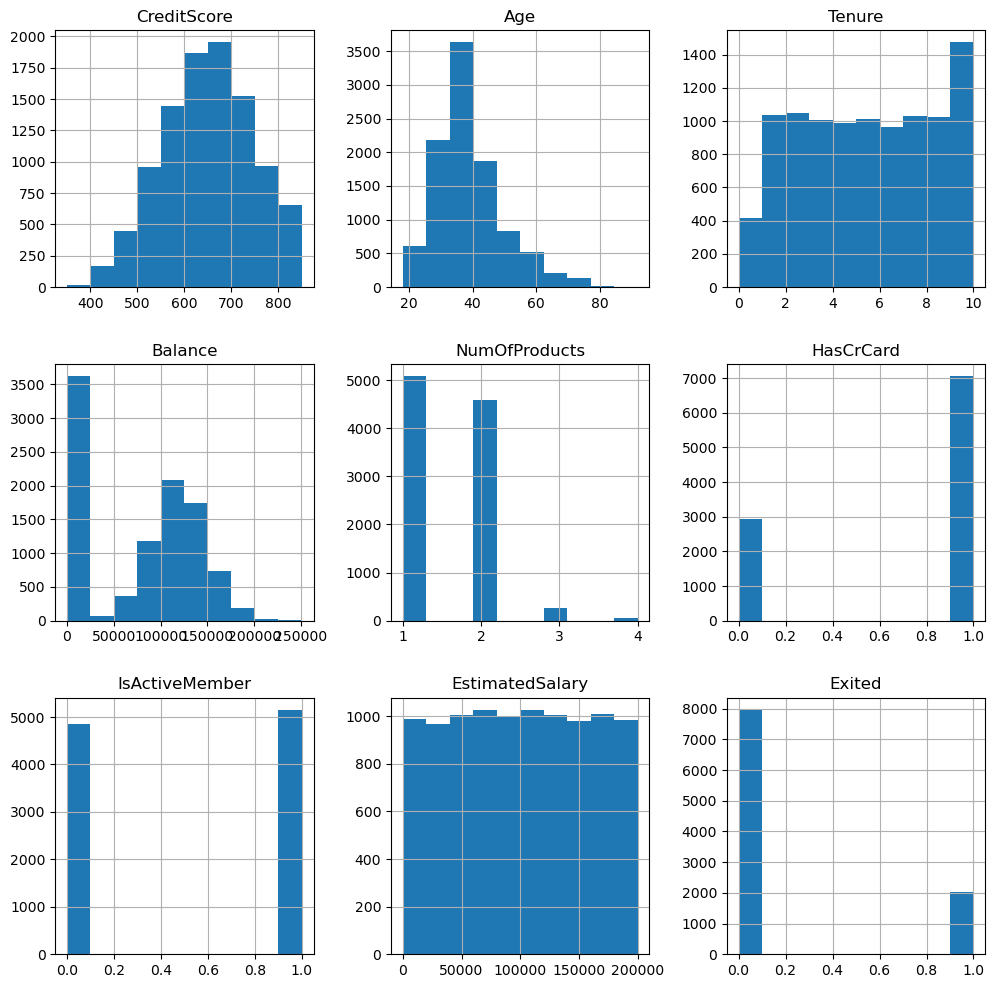

In [21]:
df.hist(figsize=(12,12))

# co-relation plot

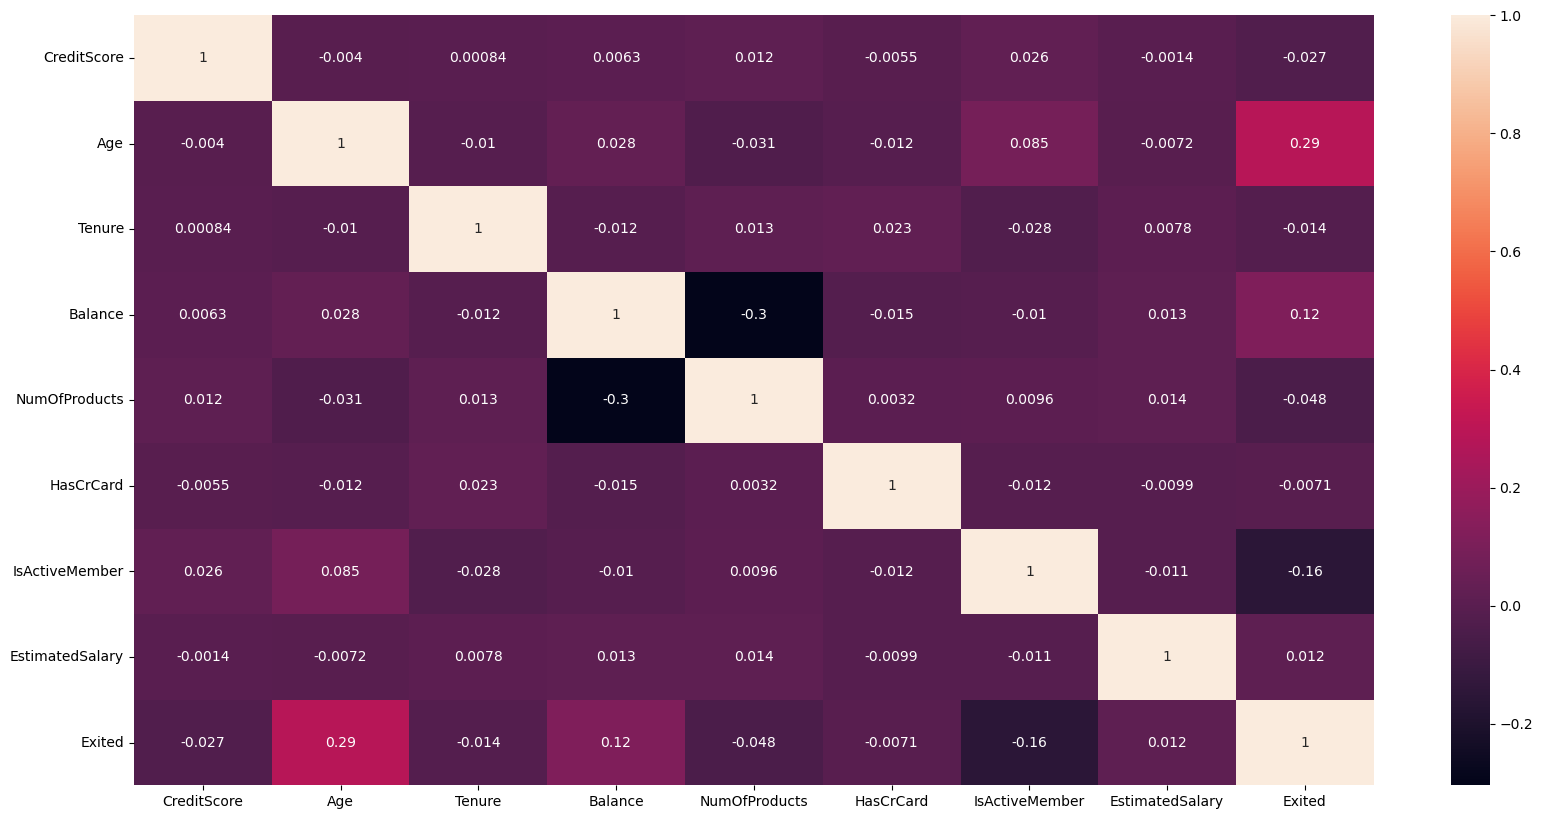

In [22]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

# Data Preprocessing

In [23]:
# Checking for NULLs in the data
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [25]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [26]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df[['Geography','Gender']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [27]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# dropping the repeated variable

In [28]:
# We have created dummies for the below variables, so we can drop them
df = df.drop(['Geography','Gender'], 1)

In [29]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# Test Train Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Putting feature variable to X
X = df.drop(['Exited'], axis=1)

X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [32]:
# Putting response variable to y
y = df['Exited']

y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [33]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [34]:
# To check the shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 11), (3000, 11), (7000,), (3000,))

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
1191,0.577154,0.121622,0.3,0.632566,0.000000,0,1,0.426074,1,0,1
4458,0.565130,0.256757,0.2,0.000000,0.333333,1,0,0.911419,0,0,1
1131,0.298597,0.256757,0.9,0.527805,0.000000,1,0,0.558546,0,1,1
9562,0.775551,0.283784,0.5,0.000000,0.333333,1,1,0.572004,0,0,1
6579,0.290581,0.243243,0.7,0.000000,0.333333,0,0,0.540544,0,0,0


In [37]:
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8018,632,23,3,122478.51,1,1,0,147230.77,1,0,1
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0
3854,687,33,9,135962.40,2,1,0,121747.96,1,0,1
2029,520,33,4,156297.58,2,1,1,166102.61,0,0,1
3539,667,42,6,0.00,1,1,0,88890.05,0,0,1


In [38]:
#scaler = MinMaxScaler()

X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8018,0.564,0.078125,0.3,0.488160,0.000000,1,0,0.736063,1,0,1
9225,0.488,0.218750,0.4,0.478581,0.333333,1,1,0.814756,1,0,0
3854,0.674,0.234375,0.9,0.541903,0.333333,1,0,0.608586,1,0,1
2029,0.340,0.234375,0.4,0.622952,0.333333,1,1,0.830468,0,0,1
3539,0.634,0.375000,0.6,0.000000,0.000000,1,0,0.444217,0,0,1


## Model Building

In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression()

In [41]:
# Training data is used for model building
lr.fit(X_train, y_train)

LogisticRegression()

In [42]:
# Testing data is used for prediction
y_pred_logreg = lr.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score

In [112]:
accuracy_score(y_test, y_pred_logreg)


0.8086666666666666

In [45]:
# Libraries for Validation of models
from sklearn.metrics import confusion_matrix

In [46]:
logistic_confusion_matrix = confusion_matrix(y_test, y_pred_logreg)
logistic_confusion_matrix

array([[2250,  126],
       [ 448,  176]], dtype=int64)

<AxesSubplot:>

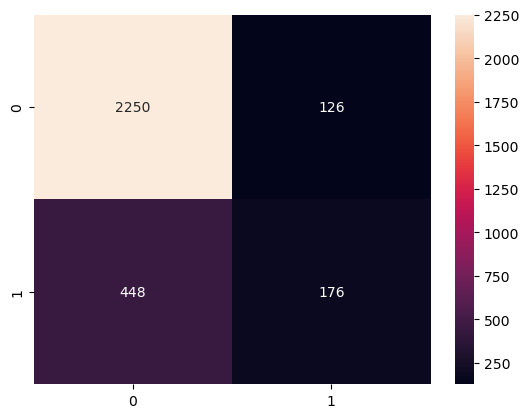

In [47]:
sns.heatmap(logistic_confusion_matrix,annot=True,fmt=".0f")





In [48]:
from sklearn.metrics import roc_curve, roc_auc_score

In [49]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', lw=2,linestyle='--')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate(1-specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(y_test, y_pred_logreg):
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred_logreg)
    TP = conf_mat[0,0:1]
    FP = conf_mat[0,1:2]
    FN = conf_mat[1,0:1]
    TN = conf_mat[1,1:2]
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(y_test, y_pred_logreg)

    print("Confusion Matrix:\n",conf_mat)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
    plot_roc_curve(fpr, tpr)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[2250  126]
 [ 448  176]]
Accuracy: [0.80866667]
Sensitivity : [0.83395107]
Specificity : [0.58278146]
Precision: [0.9469697]
Recall: [0.83395107]
F-score: [0.88687426]
AUC: 0.6145104895104895
ROC curve:


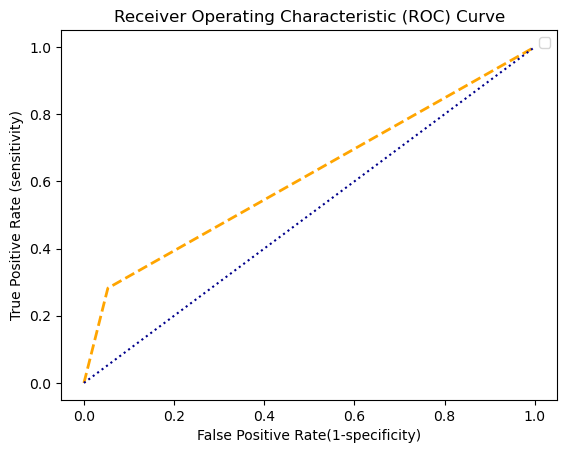

In [50]:
get_summary(y_test, y_pred_logreg)

# Support Vector Machine

In [51]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
1191,0.577154,0.121622,0.3,0.632566,0.000000,0,1,0.426074,1,0,1
4458,0.565130,0.256757,0.2,0.000000,0.333333,1,0,0.911419,0,0,1
1131,0.298597,0.256757,0.9,0.527805,0.000000,1,0,0.558546,0,1,1
9562,0.775551,0.283784,0.5,0.000000,0.333333,1,1,0.572004,0,0,1
6579,0.290581,0.243243,0.7,0.000000,0.333333,0,0,0.540544,0,0,0


In [52]:
y_train.head()

1191    0
4458    0
1131    0
9562    0
6579    0
Name: Exited, dtype: int64

In [53]:
from sklearn.svm import SVC

In [54]:
svc = SVC()

In [55]:
svc.fit(X_train, y_train)

SVC()

In [56]:
y_pred_svc = svc.predict(X_test)

In [111]:
accuracy_score(y_test, y_pred_svc)


0.847

In [58]:
SVM_confusion_matrix = confusion_matrix(y_test, y_pred_svc)
SVM_confusion_matrix

array([[2319,   57],
       [ 402,  222]], dtype=int64)

In [97]:
sns.heatmap(cm,SVM_confusion_matrix,annot=True,fmt=".0f")

NameError: name 'cm' is not defined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[2319   57]
 [ 402  222]]
Accuracy: [0.847]
Sensitivity : [0.8522602]
Specificity : [0.79569892]
Precision: [0.9760101]
Recall: [0.8522602]
F-score: [0.90994703]
AUC: 0.6658896658896659
ROC curve:


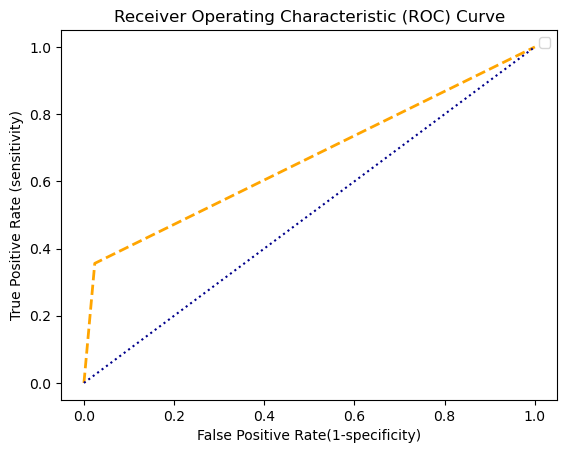

In [60]:
get_summary(y_test, y_pred_svc)

# Navis Bayes Classification

In [61]:
from sklearn.naive_bayes import GaussianNB

In [62]:
gnb = GaussianNB()

In [63]:
gnb.fit(X_train, y_train)

GaussianNB()

In [64]:
y_pred_gnb = gnb.predict(X_test)

In [110]:
accuracy_score(y_test,y_pred_gnb)

0.824

In [66]:
gnb_confusion_matrix = confusion_matrix(y_test, y_pred_gnb)
gnb_confusion_matrix

array([[2219,  157],
       [ 371,  253]], dtype=int64)

<AxesSubplot:>

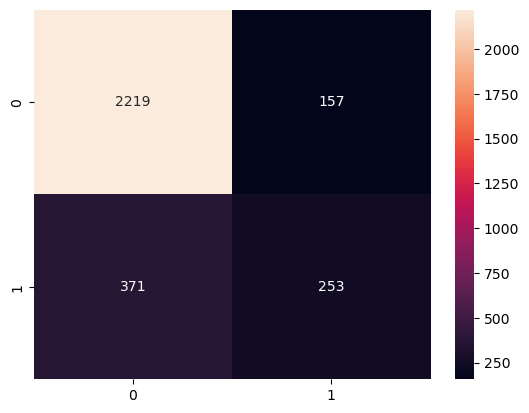

In [67]:
sns.heatmap(gnb_confusion_matrix,annot=True,fmt=".0f")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[2219  157]
 [ 371  253]]
Accuracy: [0.824]
Sensitivity : [0.85675676]
Specificity : [0.61707317]
Precision: [0.93392256]
Recall: [0.85675676]
F-score: [0.893677]
AUC: 0.6696856384356384
ROC curve:


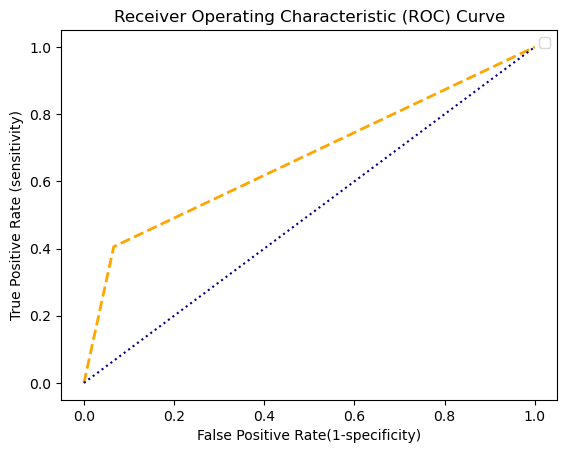

In [68]:
get_summary(y_test, y_pred_gnb)

# K Nearest Neighbour

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn = KNeighborsClassifier()

In [71]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [72]:
y_pred_knn = knn.predict(X_test)

In [109]:
accuracy_score(y_test, y_pred_knn)

0.8216666666666667

In [74]:
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)
knn_confusion_matrix

array([[2251,  125],
       [ 410,  214]], dtype=int64)

<AxesSubplot:>

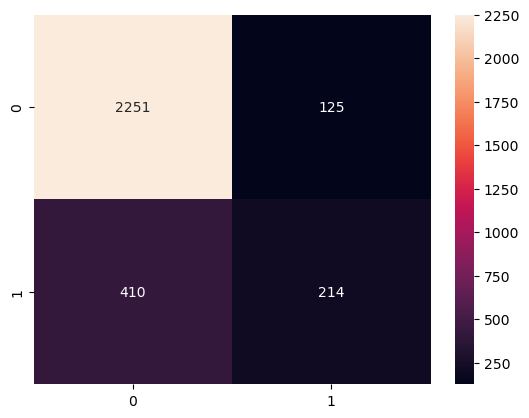

In [75]:
sns.heatmap(knn_confusion_matrix,annot=True,fmt=".0f")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[2251  125]
 [ 410  214]]
Accuracy: [0.82166667]
Sensitivity : [0.84592259]
Specificity : [0.63126844]
Precision: [0.94739057]
Recall: [0.84592259]
F-score: [0.89378598]
AUC: 0.6451696451696453
ROC curve:


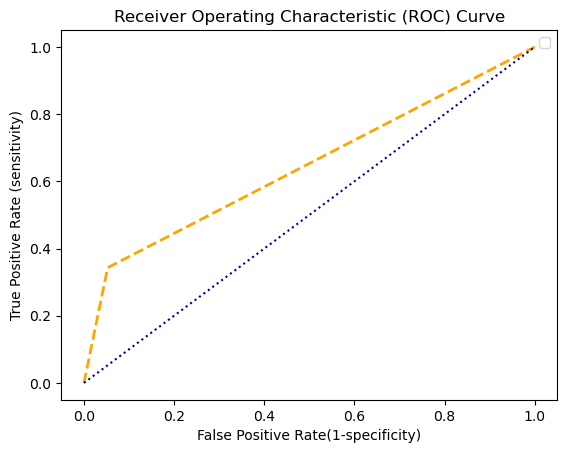

In [76]:
get_summary(y_test, y_pred_knn)

# Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
dtree = DecisionTreeClassifier()

In [79]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [80]:
y_pred_dtree = dtree.predict(X_test)


In [108]:
accuracy_score(y_test, y_pred_dtree)

0.776

In [82]:
dtree_confusion_matrix = confusion_matrix(y_test, y_pred_dtree)
dtree_confusion_matrix

array([[1980,  396],
       [ 276,  348]], dtype=int64)

<AxesSubplot:>

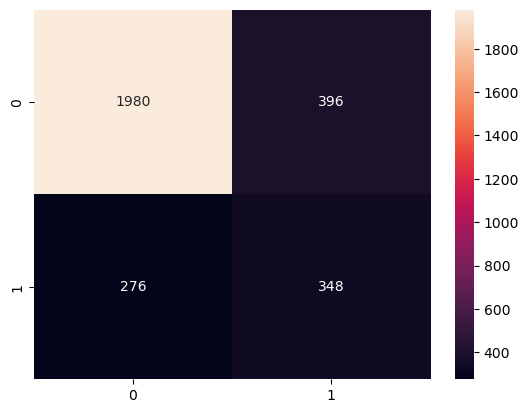

In [83]:
sns.heatmap(dtree_confusion_matrix,annot=True,fmt=".0f")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[1980  396]
 [ 276  348]]
Accuracy: [0.776]
Sensitivity : [0.87765957]
Specificity : [0.46774194]
Precision: [0.83333333]
Recall: [0.87765957]
F-score: [0.85492228]
AUC: 0.6955128205128205
ROC curve:


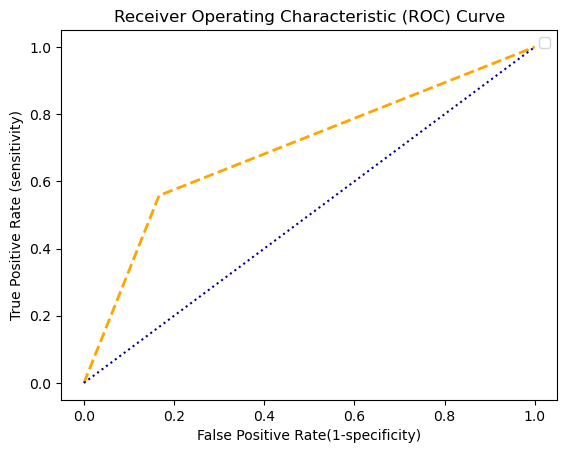

In [84]:
get_summary(y_test, y_pred_dtree)

# Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rfc = RandomForestClassifier()

In [87]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [88]:
y_pred_rfc = rfc.predict(X_test)

In [106]:
accuracy_score(y_test, y_pred_rfc)

0.8556666666666667

In [90]:
RandomForest_confusion_matrix = confusion_matrix(y_test, y_pred_rfc)
RandomForest_confusion_matrix

array([[2241,  135],
       [ 298,  326]], dtype=int64)

<AxesSubplot:>

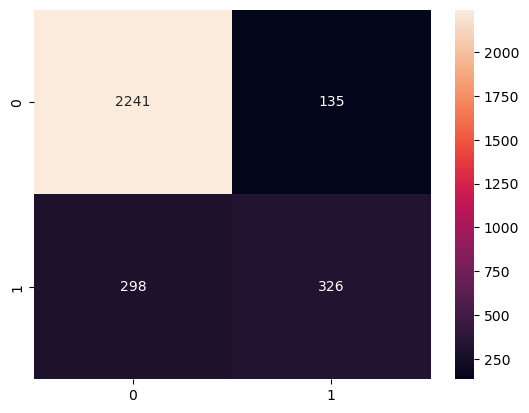

In [91]:
sns.heatmap(RandomForest_confusion_matrix,annot=True,fmt=".0f")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[2241  135]
 [ 298  326]]
Accuracy: [0.85566667]
Sensitivity : [0.88263096]
Specificity : [0.70715835]
Precision: [0.94318182]
Recall: [0.88263096]
F-score: [0.91190234]
AUC: 0.7328088578088578
ROC curve:


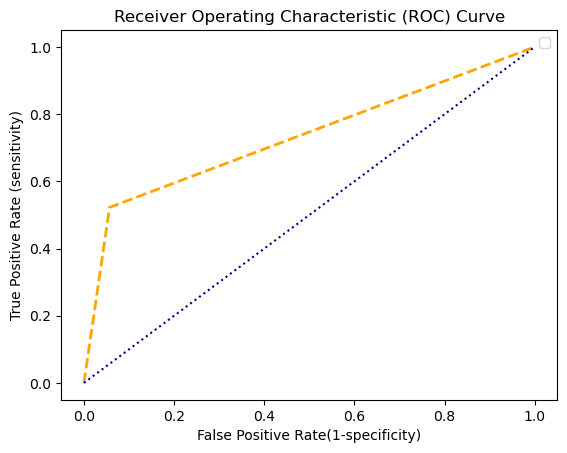

In [92]:
get_summary(y_test, y_pred_rfc)


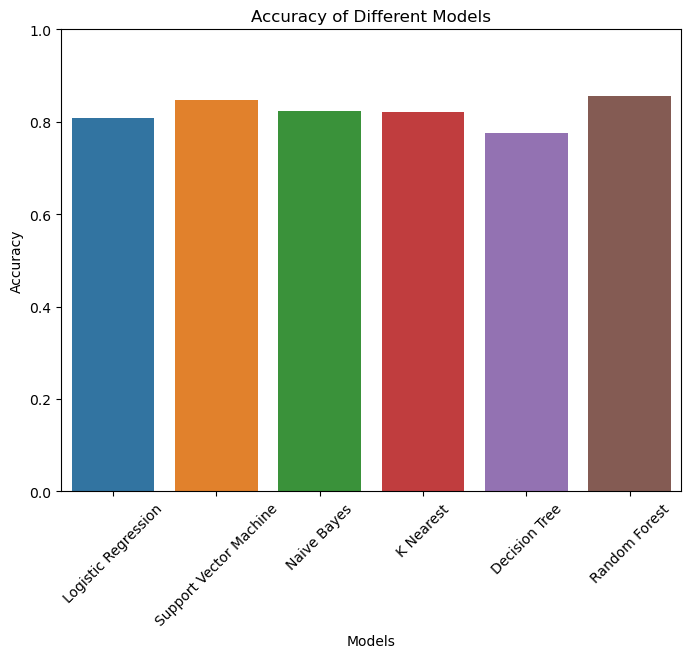

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

models = ["Logistic Regression", "Support Vector Machine", "Naive Bayes", "K Nearest", "Decision Tree", "Random Forest"]
accuracies = [0.8086666666666666, 0.847, 0.824, 0.8216666666666667, 0.776, 0.8556666666666667]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.0, 1.0) 
plt.xticks(rotation=45)
plt.show()





During Model Building; Logistic Regression, KNN, SVM, Random Forest,Naive Bayes,Decision Tree like using machine learning models Accuracy Score were calculated. Result; The model Random Forest became the model with the maxium Accuracy Score. (0.8556666)